[128 131 132 133 134 135 136 137 138 139 140 142 146 153 170 255]


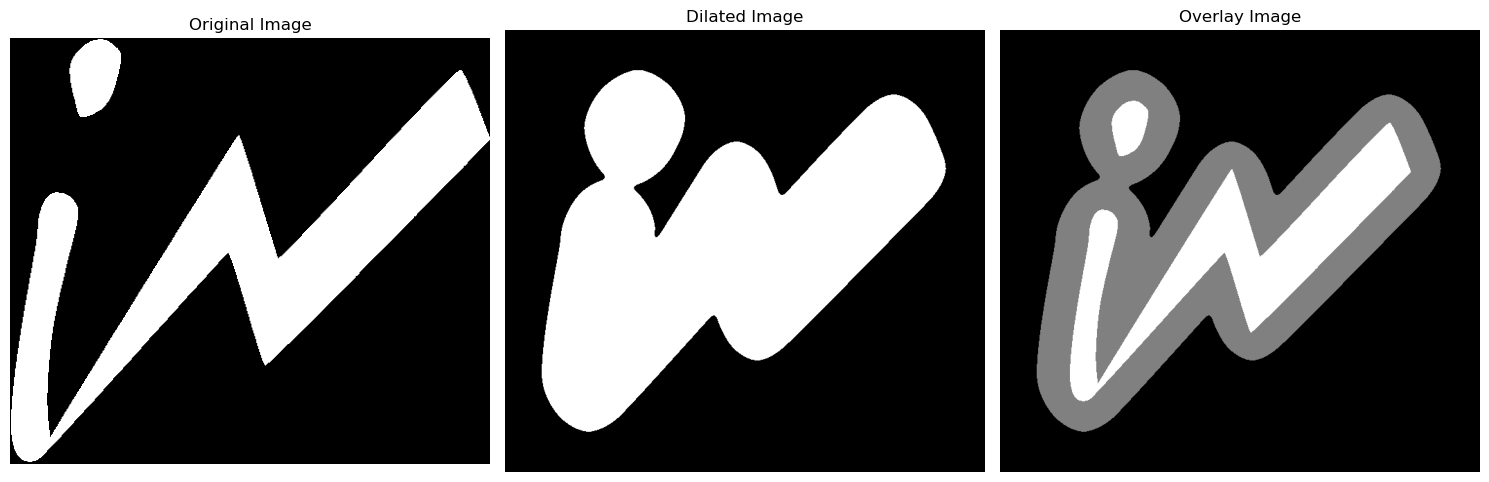

In [50]:
import numpy as np
from skimage import io, morphology, color
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter

# Load the image
image_path = 'iw2.png'  # Replace with your image path
gray_image = io.imread(image_path)[:, :, 1]

# Print unique values in the image (for debugging purposes)
print(np.unique(gray_image))

# Threshold the image to create a binary image
# You can adjust the threshold value as needed
threshold = 170
binary_image = gray_image < threshold

# Pad the binary image by 100 pixels on all sides using constant value 0
padding = 100
padded_binary_image = np.pad(binary_image, pad_width=padding, mode="constant", constant_values=0)

# Create a structuring element (you can adjust the size)
structuring_element = morphology.disk(4)

# Perform dilation
dilated_image = padded_binary_image
for i in range(12):
    dilated_image = morphology.dilation(dilated_image, structuring_element)
    # Apply Gaussian blur to smooth the binary image
    dilated_image = gaussian_filter(dilated_image.astype(float), sigma=4)
    # Convert the smoothed image back to binary
    dilated_image = dilated_image > 0.5

center_x = (dilated_image.shape[1] - binary_image.shape[1]) // 2
center_y = (dilated_image.shape[0] - binary_image.shape[0]) // 2
# Overlay the original image back into the center of the dilated image
overlay_image = dilated_image.copy().astype(np.uint8)
overlay_image[center_y:center_y + binary_image.shape[0], center_x:center_x + binary_image.shape[1]] += binary_image.astype(np.uint8)

# Display the original and overlaid images
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
ax = axes.ravel()

ax[0].imshow(binary_image, cmap=plt.cm.gray)
ax[0].set_title('Original Image')

ax[1].imshow(dilated_image, cmap=plt.cm.gray)
ax[1].set_title('Dilated Image')

ax[2].imshow(overlay_image, cmap=plt.cm.gray)
ax[2].set_title('Overlay Image')

for a in ax:
    a.axis('off')

plt.tight_layout()
plt.show()


In [54]:
from PIL import Image
# Convert to RGB image with transparent background
rgb_image = np.zeros((*overlay_image.shape, 4), dtype=np.uint8)

# Set the dilated part to white and the central original image to #FF87B7
rgb_image[overlay_image > 0] = [255, 255, 255, 255]  # White for dilated part
rgb_image[center_y:center_y + binary_image.shape[0], center_x:center_x + binary_image.shape[1]][binary_image > 0] = [255, 135, 183, 255]  # #FF87B7 for original image

# Set the background to be transparent
rgb_image[overlay_image == 0] = [0, 0, 0, 0]

# Save the image as PNG
Image.fromarray(rgb_image).save('overlay_image.png')

In [55]:
# Save the dilated image as SVG
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(overlay_image, cmap=plt.cm.gray)
ax.axis('off')

svg_path = 'overlay_image.svg'
fig.savefig(svg_path, format='svg', bbox_inches='tight')
plt.close(fig)

print(f'Overlay image saved as {svg_path}')

Overlay image saved as overlay_image.svg
